#**Exploratory Data Analysis on Spotify Dataset**

The objective of this project is to analyze and explore the spotify dataset through different visualizations and answering interesting questions to get more insight about the dataset.

[Spotify](https://https://www.spotify.com/us/) is a digital music service that gives you access to millions of songs.

The dataset is taken from https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks.

**Downloading the Dataset**

opendatasets library is used to downlad and extract the dataset from kaggle. So let's install and import the required libraries.

In [6]:
pip install opendatasets --upgrade

Requirement already up-to-date: opendatasets in /usr/local/lib/python3.7/dist-packages (0.1.13)


Let's begin by downloading the data, and listing the files within the dataset.

In [7]:
dataset_url = 'https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks'

In [8]:
import opendatasets as od
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vedmaurya
Your Kaggle Key: ··········


 14%|█▍        | 27.0M/195M [00:00<00:00, 275MB/s]

100%|██████████| 195M/195M [00:00<00:00, 239MB/s]


In [9]:
data_dir = './spotify-dataset-19212020-160k-tracks'

In [10]:
import os
os.listdir(data_dir)

['artists.csv',
 'dict_artists.json',
 'data_o.csv',
 'data_by_year_o.csv',
 'tracks.csv',
 'data_by_genres_o.csv',
 'data_by_artist_o.csv']

##**Data Preparation and Cleaning**

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. we will use it to load and prepare the dataset.

In [11]:
import pandas as pd

In [12]:
tracks = pd.read_csv(data_dir + '/tracks.csv')

In [13]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [14]:
tracks.shape

(586672, 20)

Tracks has 20 columns, we will be using only selected columns.

In [15]:
selected_columns = [
    'name',
    'popularity',
    'duration_ms',
    'explicit',
    'artists',
    'release_date',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

We have selected a total of 15 columns. Let's copy these columns to a seperate dataframe for further processing.

In [16]:
tracks_df = tracks[selected_columns].copy()

In [17]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              586601 non-null  object 
 1   popularity        586672 non-null  int64  
 2   duration_ms       586672 non-null  int64  
 3   explicit          586672 non-null  int64  
 4   artists           586672 non-null  object 
 5   release_date      586672 non-null  object 
 6   danceability      586672 non-null  float64
 7   energy            586672 non-null  float64
 8   loudness          586672 non-null  float64
 9   speechiness       586672 non-null  float64
 10  acousticness      586672 non-null  float64
 11  instrumentalness  586672 non-null  float64
 12  liveness          586672 non-null  float64
 13  valence           586672 non-null  float64
 14  tempo             586672 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 67.1+ MB


In [18]:
tracks_df.sample(10)

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
336088,จะขอก็รีบขอ,30,155077,0,['Paowalee Pornpimon'],2015-12-18,0.754,0.848,-4.358,0.0364,0.16100,0.000010,0.124,0.8490,130.032
296935,Une Grève,9,168520,0,['Claude Léveillée'],1967,0.211,0.121,-17.490,0.0334,0.95600,0.910000,0.167,0.3320,104.666
264004,Marathon - Simon O'Shine Breakdown,1,62476,0,"[""Simon O'Shine"", 'Adam Navel']",2015-01-14,0.345,0.478,-12.291,0.0366,0.34600,0.900000,0.455,0.0392,139.312
138327,Caminhemos,15,197333,0,['Nelson Gonçalves'],1960,0.238,0.245,-10.149,0.0332,0.93000,0.000033,0.265,0.1630,88.635
9020,True (Roy Fox),0,187253,0,['Roy Fox'],1934,0.350,0.150,-17.758,0.0412,0.94200,0.009200,0.324,0.3790,136.637
131643,Some Time In 2014 Year,0,477500,0,['DMITRY HERTZ'],2017-10-10,0.538,0.856,-7.031,0.0318,0.00104,0.849000,0.109,0.0814,89.999
131676,Frame of Mind,62,274286,0,"['Tristam', 'Braken']",2014-04-25,0.435,0.727,-6.969,0.0611,0.04240,0.000005,0.105,0.3990,174.992
473575,Suena la Alarma,33,257971,0,['Los Cafres'],1997-09-01,0.839,0.467,-8.318,0.0730,0.00593,0.000027,0.289,0.8930,91.261
54355,Four Walls - 2011 Remastered,40,142801,0,['Cold Chisel'],1980,0.540,0.257,-9.182,0.0282,0.77900,0.000000,0.117,0.2370,135.615
26978,Roman Holiday Suite 1,7,186562,0,['Georges Auric'],1953-12-31,0.206,0.511,-9.346,0.0579,0.93600,0.562000,0.357,0.4340,80.010


The release_date column contains the date on which the song was released but the it seems to be inconsistent. In many entries the column only contains the year of release. To keep the data consistent we will add a new column named Year containing only the release year of the song.

In [19]:
def to_year(x):
    result = []
    x.to_string()
    for i in x:
        result.append(int(i[:4]))
    return result

tracks_df['year'] = to_year(tracks_df.release_date)

In [20]:
tracks_df.sample(10)

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
458520,Le tube de toilette,13,140733,0,['Boby Lapointe'],1984-01-01,0.722,0.3900,-11.170,0.1920,0.532000,0.000000,0.2390,0.8340,131.635,1984
163264,"Uno, Dos y Tres (Y Me Das un Beso)",32,178840,0,['Juan Gabriel'],1972-05-04,0.525,0.7670,-9.202,0.0380,0.383000,0.000000,0.0411,0.9260,121.546,1972
94834,"BeIlini: I Puritani, Act 2: ""Suoni la tromba e...",1,196453,0,"['Vincenzo Bellini', 'Nicola Rossi-Lemeni', 'O...",1953,0.390,0.3510,-10.963,0.0574,0.964000,0.201000,0.1370,0.3230,122.074,1953
301180,Put It Off,26,310933,0,['The Tragically Hip'],1996-01-01,0.409,0.2330,-12.511,0.0344,0.022600,0.775000,0.1100,0.1060,131.981,1996
326181,快樂又逍遙,25,153863,0,['凌雅'],1978,0.631,0.6120,-5.388,0.0361,0.742000,0.000035,0.4630,0.5770,128.053,1978
302843,2007: The Year Punk Broke (My Heart) - Remastered,15,272013,0,['Los Campesinos!'],2008-02-22,0.218,0.9060,-6.392,0.0450,0.000004,0.816000,0.0899,0.1810,142.483,2008
34012,Appalachian Spring: VI. Meno mosso,25,74400,0,"['Aaron Copland', 'Leonard Bernstein', 'New Yo...",1960,0.135,0.0179,-34.134,0.0447,0.918000,0.687000,0.1100,0.0349,143.091,1960
458521,Get Off (You Fascinate Me),32,379400,0,['Patrice Rushen'],1984,0.839,0.5430,-8.397,0.0477,0.007870,0.484000,0.0453,0.9380,116.212,1984
42281,Triad,33,294400,0,['Jefferson Airplane'],1968,0.375,0.1260,-18.119,0.0359,0.660000,0.000360,0.0808,0.1120,179.450,1968
510182,Sufferer,23,205267,0,['The Kingstonians'],1969-01-01,0.709,0.6070,-9.329,0.3010,0.081800,0.000211,0.1380,0.8330,156.034,1969


Siimilarly, we will load and process the artists dataset.

In [21]:
artists_raw_df = pd.read_csv(data_dir + '/artists.csv')
artists_raw_df.sample(10)

,id,followers,genres,name,popularity
1041424,1L3Mvvn0MLXWkr9W5DTWSf,36.0,[],Vinyl Surprise,0
897192,7p1kpPU3ZGPRg0V5PCFEYu,41.0,[],Como Mio,39
92438,00zxCUa9QlIZW4Uf6cTLNd,0.0,[],Kophi China,0
767192,3XjvsSG1UBSBE7dU6avndz,15.0,[],Fleming Pie,0
438175,0m0zBFNdWk0vboTh9xNaNd,18.0,[],NO☆GAIN,0
864324,63SLfJJGFvLv6PuGbr4omD,24.0,[],Bamselito,0
722493,0zpehBjhOYsYfhjjUPvmnd,1358.0,['turbo folk'],Marko Vanilla,31
1070607,4pCJSQTWNpnf6oXLh5UAuS,54.0,[],Avermax,5
765331,3PtZtHKRFAmIZYgwlzsncI,1.0,[],The Pleegs,0
50031,1c8m6rFeA6QIhImbIaZ7k2,34310.0,"['modern salsa', 'pop reggaeton', 'salsa venez...",Ronald Borjas,44


In [22]:
artists_df = artists_raw_df[['name', 'followers', 'genres', 'popularity']].copy()
artists_df.sample(10)

,name,followers,genres,popularity
591676,Crooked Mouth,33.0,[],0
827461,Saved Savage,4.0,[],0
5642,Gleyson Nascimento,24.0,[],1
443217,Los Autenticos De La Banda,61.0,[],8
558978,One Dub Connection,16.0,[],0
124163,Saviat4r,0.0,[],0
927429,Rock Bottom String Band,1863.0,"['deathgrass', 'san marcos tx indie']",16
1091223,Amanda Ghost,1371.0,['lilith'],16
861946,JJ Neo,33.0,[],7
98476,Hasse Andersson,36095.0,"['classic swedish pop', 'dansband', 'danspunk'...",49


In [23]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   name        1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 33.7+ MB


#Exploratory Analysis and Visualization
Before we ask questions about the dataset, let's explore the different factors and see if we can come up with any interseting insights.

Let's begin by importing matplotlib.pyplot and seaborn.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

###Number of Songs

First let's look at the number of songs every year in the dataset.

In [25]:
yearwise_tracks = tracks_df.groupby('year')['name'].count()
yearwise_tracks

year
1900        1
1922      276
1923      657
1924      633
1925      903
        ...  
2017     9889
2018    10936
2019    11907
2020    13937
2021     6281
Name: name, Length: 101, dtype: int64

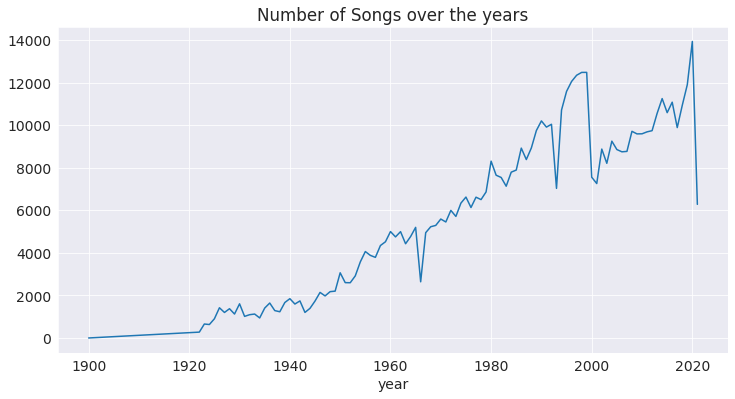

In [26]:
plt.title('Number of Songs over the years')
sns.lineplot(x=yearwise_tracks.index, y=yearwise_tracks.values);


From the line graph it is clear that the number of songs every year has been increasing overall. Note that there is a sudden decrease in number of songs after 2020, it is because the dataset contains the songs only upto April 2021. We sould also keep in mind that the number of songs in the dataset depends on the data collection methodology used by the author of the dataset.



###Genres

Now, lets look at the different genres of the songs.

In [27]:
artists_df["genres"] = artists_df["genres"].apply(eval)

def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

top_genres = to_1D(artists_df.genres).value_counts().head(15)
top_genres

dance pop                572
pop                      568
rock                     564
electro house            558
classical performance    502
latin                    498
indie rock               485
hip hop                  484
pop rap                  467
rap                      461
edm                      460
electropop               458
french hip hop           452
latin rock               446
modern rock              444
dtype: int64

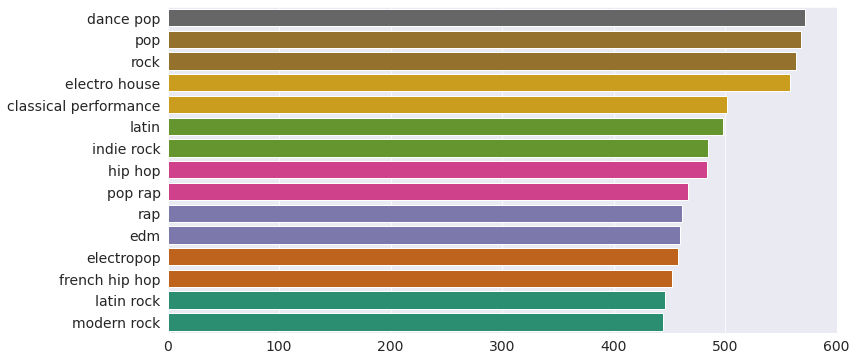

In [28]:
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Dark2_r')

From the graph it is evident that pop, rock and electo house genres have the most number of artists associated with them.

###Advisory label
Certain songs have parental advisory label associated with them indicating the song contains adult content which may not be suitable for children. Let's see how many songs in the dataset have advisory label associated with them.

In [29]:
tracks_df.explicit.value_counts()

0    560808
1     25864
Name: explicit, dtype: int64

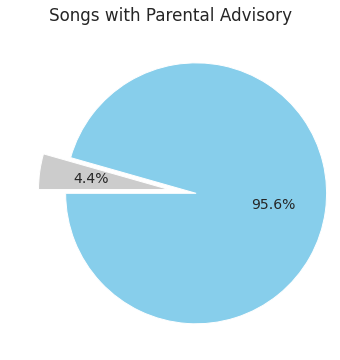

In [30]:
plt.title('Songs with Parental Advisory')
plt.pie(tracks_df.explicit.value_counts(), 
        explode=(0.2, 0.01), 
        colors=['skyblue','#cccccc'], 
        autopct='%1.1f%%', 
        startangle=180);

Around ~4.4% of songs in the dataset have advisory label associated with them.

###Time Duration
The duration_ms column of the tracks dataframe contains the time duration of the song in milliseconds. Let's visualize it's ditribution.

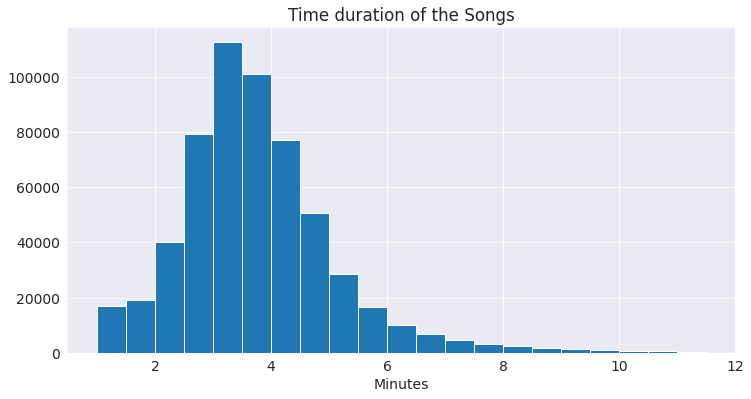

In [31]:
plt.title('Time duration of the Songs')
plt.xlabel('Minutes')
#converting milliseconds to minutes
plt.hist(tracks_df.duration_ms / (1000 * 60), bins=np.arange(1,12,0.5));

Most songs seem to be between 3 to 4 mintues long.

###Audio Features
The songs have certain audio features associated with them. Let's understand what they mean and what correaltion they have with each other.

**danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

**loudness** : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

**speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry),the closer to 1.0 the attribute value.

**acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**instrumentalness** : Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

**liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

**valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.

**tempo** : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [32]:
tracks_df.describe()

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,-10.206067,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,1988.566168
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,5.089328,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,22.831283
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,-12.891000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,1974.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,-9.243000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,1992.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,-6.482000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,2007.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,5.376000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,2021.000000


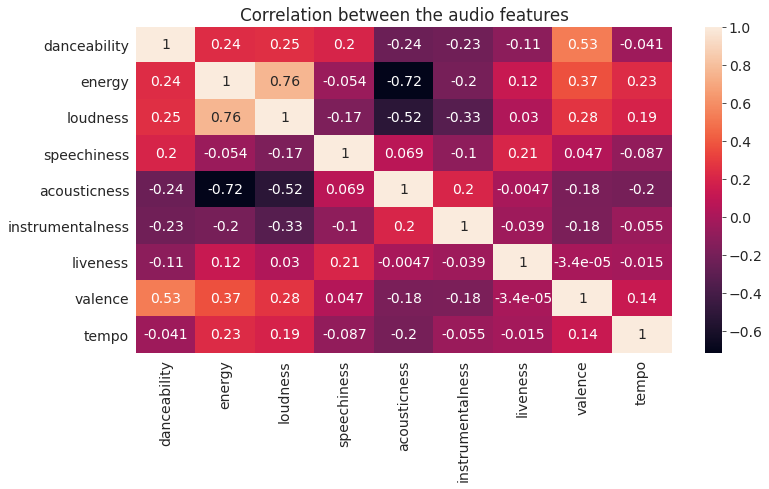

In [33]:
corr = tracks_df[['danceability', 
                  'energy', 
                  'loudness', 
                  'speechiness', 
                  'acousticness', 
                  'instrumentalness', 
                  'liveness',
                  'valence', 
                  'tempo' ]].corr()

plt.title('Correlation between the audio features')
sns.heatmap(corr, annot=True);

The following observations can be made from the above heatmap:


*   There is a strong positive correlation between energy and loudness.

*   Also there is a positive correlation between valence and danceablity.

*   There seems to be strong negative correlation between acousticness and energy.










#Asking and Answering Questions
Now, let's ask and answer some interesting questions about the dataset.

**Q: Which are the most Danceable tracks ?**

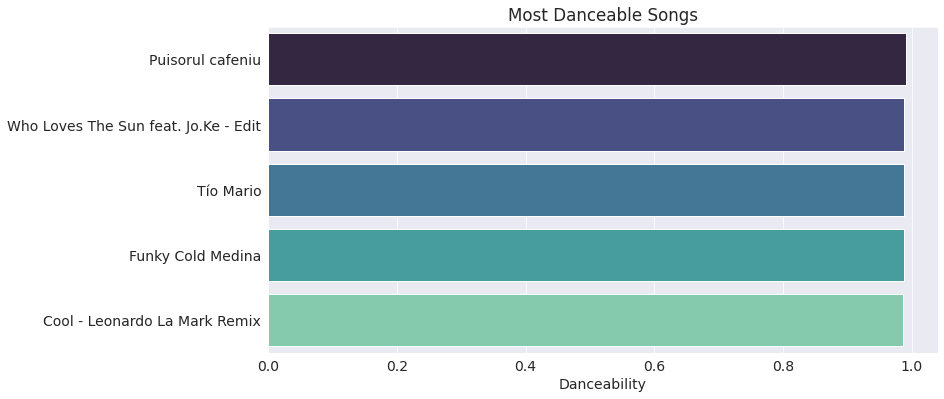

In [34]:
most_danceable_tracks = tracks_df.sort_values('danceability', ascending=False).head(5)
sns.axes_style('white')
plt.title('Most Danceable Songs')
sns.barplot(x='danceability', y='name', palette='mako', data=most_danceable_tracks)
plt.xlabel('Danceability')
plt.ylabel('');

**Q Who are the artists with most followers ?**

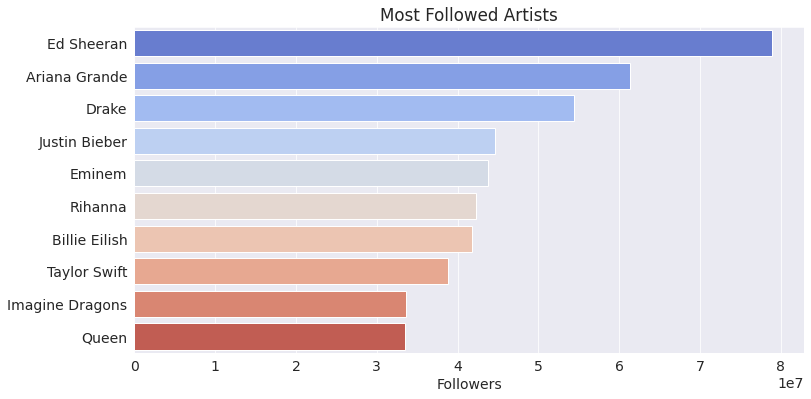

In [35]:
top_artists = artists_df.sort_values('followers', ascending=False).head(10)
sns.axes_style('white')
plt.title('Most Followed Artists')
sns.barplot(x='followers', y='name', palette='coolwarm', data=top_artists)
plt.xlabel('Followers')
plt.ylabel('');

**Q: What are the song trends over time ?**

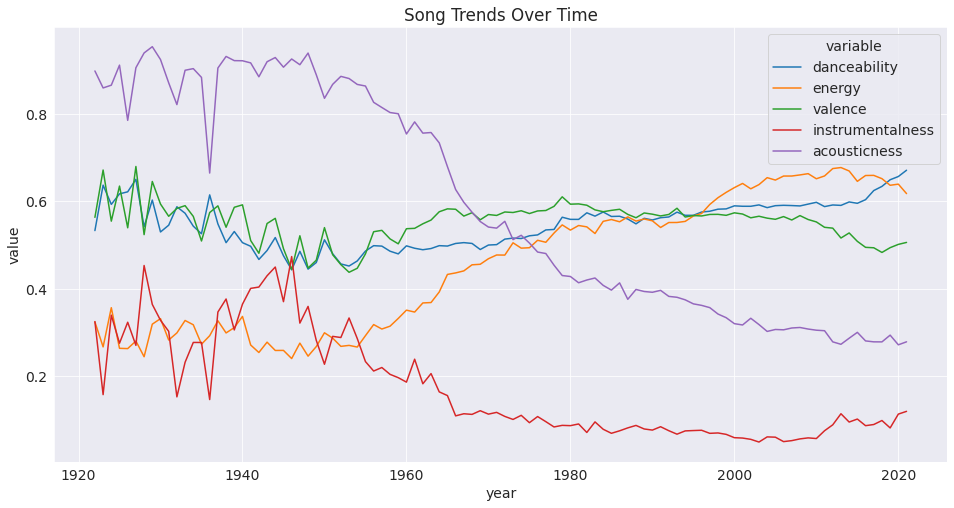

In [36]:
yearwise_average = tracks_df.groupby('year')[['year',
                                              'danceability', 
                                              'energy', 
                                              'valence', 
                                              'instrumentalness', 
                                              'acousticness']].mean()[1:]
yearwise_average = yearwise_average.melt(id_vars='year')

plt.figure(figsize=(16,8))
plt.title('Song Trends Over Time')
sns.lineplot(x='year', y='value', hue='variable', data=yearwise_average);

From the graph it is obserable that the overall acousticness has decreased and the energy has increased over time.

**Q: Which are some of the most Popular songs ?**

Popularity is an extremely important value that Spotify uses internally to rank all artists and tracks on a scale from 0 to 100. Spotify Popularity gives you a valuable insight into how the Spotify algorithm currently evaluates the song.

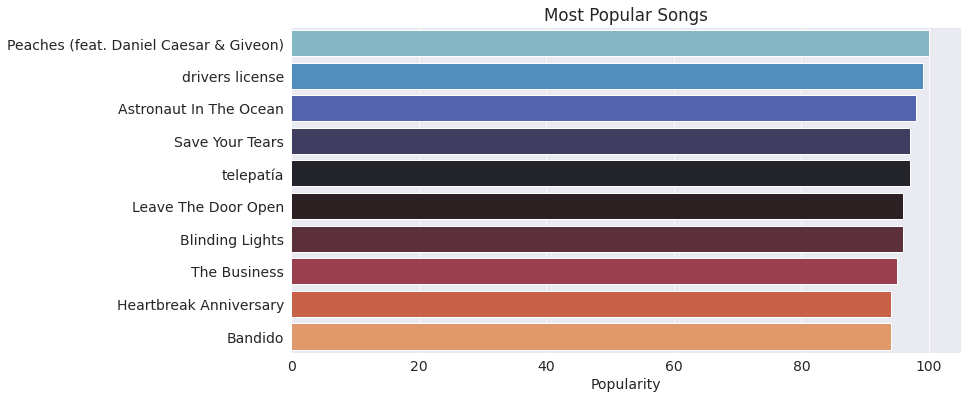

In [37]:
popular_songs = tracks_df.sort_values('popularity', ascending=False).reset_index(drop=True).head(10)
sns.axes_style('white')
plt.title('Most Popular Songs')
sns.barplot(x='popularity', y='name', palette='icefire', data=popular_songs)
plt.xlabel('Popularity')
plt.ylabel('');

**Q: Who are some of the most Popular artists ?**

The popularity of the artist is between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.

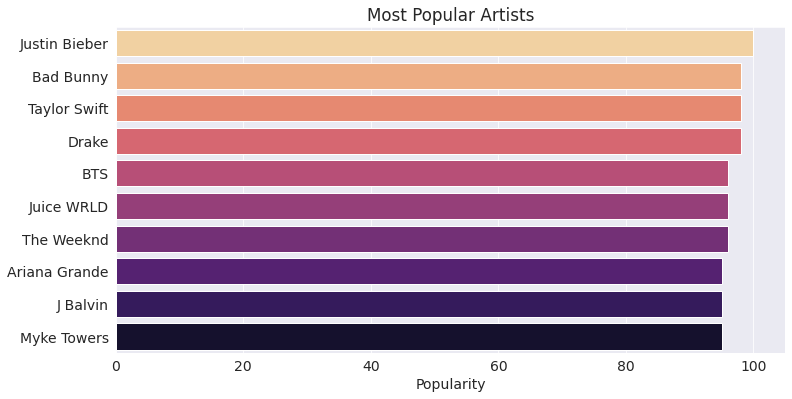

In [38]:
popular_artists = artists_df.sort_values('popularity', ascending=False).head(10)

sns.axes_style('white')
plt.title('Most Popular Artists')
sns.barplot(x='popularity', y='name', palette='magma_r', data=popular_artists)
plt.xlabel('Popularity')
plt.ylabel('');

#**Inferences and Conclusion**
Here's a summary of few of the inferences from made from the dataset:

 

*   There is an overall growth of the number of songs each year in the spotify database.
*   pop, rock and electro house are some of the most popular genres with most number of artists asociated with them.

*   Around ~4.4% of songs in the dataset have advisory label associated with them.
*   Majority of songs are around 3-4 minutes long.

*   Spotify popularity is a value that Spotify uses internally to rank all artists and tracks on a scale from 0 to 100.
*   It can be used to determine the most popular songs and artists in recent times.








 